# Regression Using both non-ML and ML aproach
First we load the packages we will use

In [56]:
using CSV
using GLM
using Plots
using TypedTables
using ScikitLearn
using PyCall
using DataFrames

## Non-ML aproach
Load the data to the Portland-Oregon area from the CSV file

In [20]:
Data  = CSV.File("housingdata.csv")

X = Data.size
Y = round.(Int, Data.price/1000)
tab = Table(X = X, Y = Y);

Now using Plots we generate a scatter plot of the data

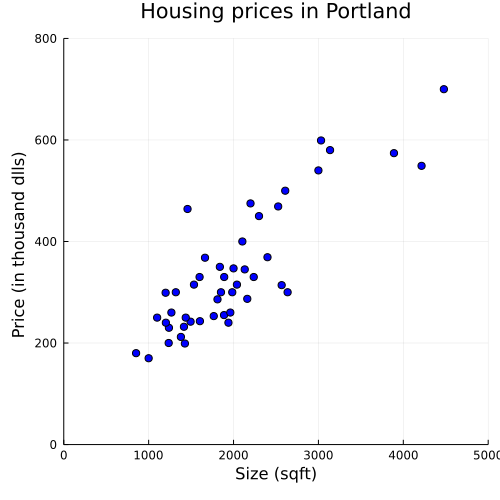

In [21]:
gr(size = (500,500))
ScatterPlot = scatter(X, Y,
    xlims = (0, 5000),
    ylims = (0,800),
    xlabel = "Size (sqft)",
    ylabel = "Price (in thousand dlls) ",
    title = "Housing prices in Portland",
    legend = false,
    color = :blue,
    ) 

using GLM package for Linear Regression model, GLM seems to work with tables, that is why we coverted the data into a table

In [22]:
ols = lm(@formula(Y ~ X),tab)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  71.2898    26.1331      2.73    0.0091  18.655     123.925
X             0.134533   0.0121571  11.07    <1e-13   0.110047    0.159018
──────────────────────────────────────────────────────────────────────────

Adding lienar regression line to the plot

In [23]:
plot!(X, predict(ols), color = :red, linewidth = 3)

LoadError: UndefVarError: predict not defined

Predict price based on a new value for size

In [ ]:
x1 = Array([2000])
NewX = Table(X = x1)
pred1 = predict(ols, NewX)


1-element Vector{Union{Missing, Float64}}:
 340.35521176594494

## ML aproach
we set the work area and re-plot the scatter

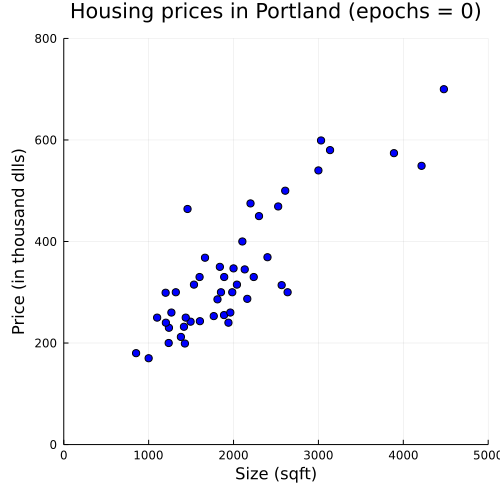

In [ ]:
epochs = 0;

gr(size = (500,500))

ScatterPlot = scatter(X, Y,
    xlims = (0, 5000),
    ylims = (0,800),
    xlabel = "Size (sqft)",
    ylabel = "Price (in thousand dlls)",
    title = "Housing prices in Portland (epochs = $epochs)",
    legend = false,
    color = :blue,
    ) 

initialize parameters

In [ ]:
θ₀=0.0  #y-intercep
θ₁=0.0 #slope

0.0

define linear regression model, with the linear function: $$h(x)=\theta_0+\theta_1 x$$ and adding the regression line to the plot

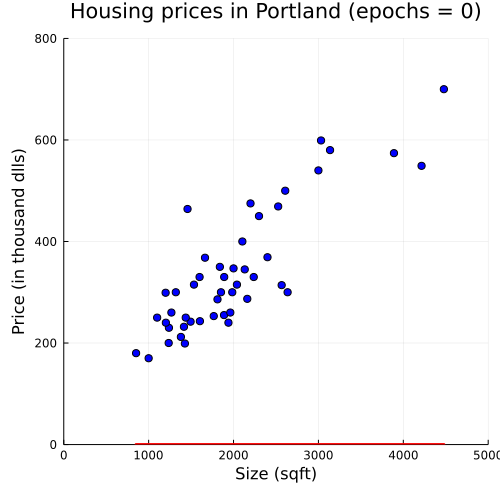

In [ ]:
h(x) = θ₀ .+ θ₁*x
plot!(X, h(X), color = :red, linewidth = 3)

we need something that say to us how good the parameters are tune, so we use the cost fuction (here is the mean square error divided by 2)  $$J(\theta_0,\theta_1)=\frac{1}{2m}\sum _{i=1}^m( h_{\theta}(x^{(i)}+y^{(i)}) )^2 $$ 

In [ ]:
m = length(X) #number of samples
ŷ = h(X)
function cost(X, Y)
    (1/(2*m))*sum((ŷ-Y).^2)
end
J_function = cost(X, Y)


65601.13829787234

Pushing cost value into vector, is the value that we want to minimize 

In [ ]:
J_history = []
push!(J_history,J_function)


1-element Vector{Any}:
 65601.13829787234

#### Using Batch Gradient Descent Algorithm
1.-change parameters\
2.-check cost\
3.- repeat\
how? taking the partial derivative respect $\theta_0$ and $\theta_1$ and iterate over the lenght
$$ \partial_{\theta_0}J=\frac{1}{m}\sum_{i=1}^2h_{\theta}(x^{(i)}+y^{(i)}) $$ 
$$ \partial_{\theta_1}J=\frac{1}{m}\sum_{i=1}^2h_{\theta}(x^{(i)}+y^{(i)})x^{(i)} $$ 




In [ ]:
function partial_J_theta0(X, Y)
    (1/(m))*sum(ŷ-Y)
end
function partial_J_theta1(X, Y)
    (1/(m))*sum((ŷ-Y).*X)
end
α₀ = 0.09 #learn parameter
α₁ = 0.00000008

8.0e-8

In [ ]:
θ₀_temp = partial_J_theta0(X, Y) 
θ₁_temp = partial_J_theta1(X, Y)
println(θ₀_temp," ",θ₁_temp )

-340.4468085106383 -764282.0425531914


Adjustin parameters by the learning rate

In [ ]:
θ₀ -= α₀*θ₀_temp
θ₁ -= α₁*θ₁_temp
print(θ₀, " ", θ₁)

30.640212765957443 0.061142563404255314

recalculate cost and the see if we are having a minimization y the function

In [ ]:
ŷ = h(X);
J_function = cost(X, Y)
push!(J_history, J_function)

2-element Vector{Any}:
 65601.13829787234
 21294.442905808777

Replotting prediction

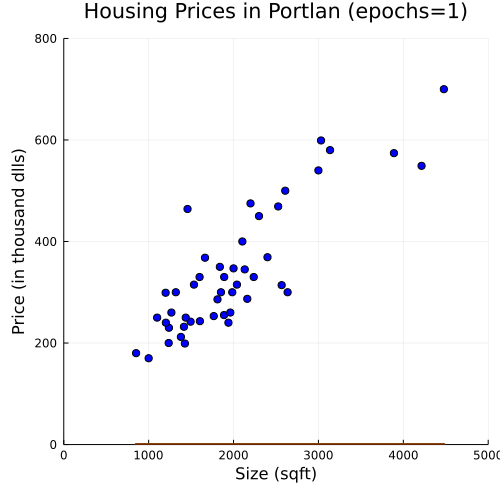

In [ ]:
epochs+=1
plot!(X, ŷ, color = :green, α =0.5, linewidth = 3,
title = "Housing Prices in Portlan (epochs=$epochs)"
)

Iterating we have

21294.442905808777
7880.555083450037
3819.483341935793
2589.9824221431873
2217.7414333364172
2105.0365736681783
2070.906602608602
2060.5653934162438
2057.4264102828856
2056.4680663773183
2056.1700701245018
2056.072149236493
2056.0349529572113
2056.0162897755313
2056.003383258429
2055.9923624629573
2055.982052645115
2055.9720953921433
2055.9623794903723
2055.9528686190483
2055.94354918349
2055.9344145205205
2055.925460115638
2055.916682154034
2055.9080770809333
2055.899641467547
2055.891371969552
2055.883265313615
2055.8753182924106
2055.867527762244


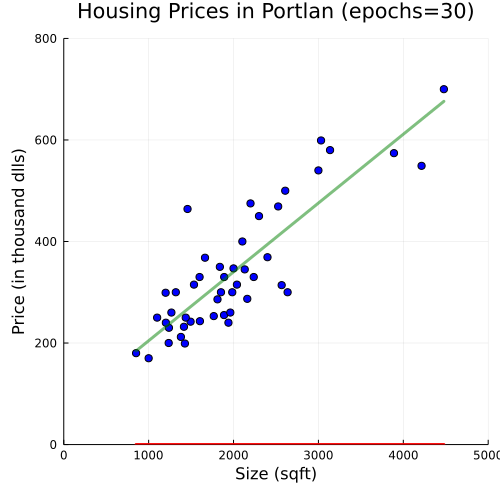

In [ ]:
for i=1:30
    θ₀_temp = partial_J_theta0(X, Y) 
    θ₁_temp = partial_J_theta1(X, Y)

    θ₀ -= α₀*θ₀_temp
    θ₁ -= α₁*θ₁_temp

    ŷ = h(X);
    J_function = cost(X, Y)
    push!(J_history, J_function)

    epochs=i
    println(J_function)
end
plot!(X, ŷ, color = :green, α =0.5, linewidth = 3,
title = "Housing Prices in Portlan (epochs=$epochs)")

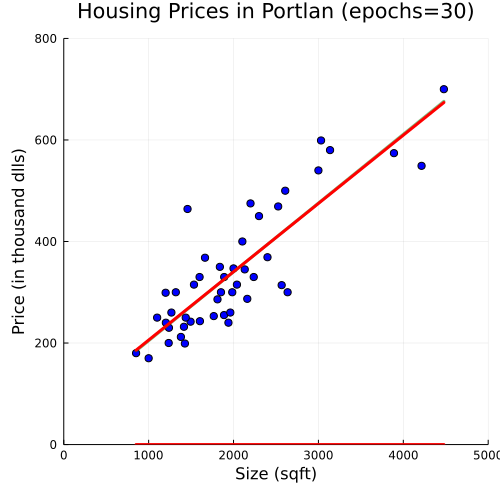

In [ ]:
plot!(X, predict(ols), color = :red, linewidth = 3)

Now let us see the learn curve

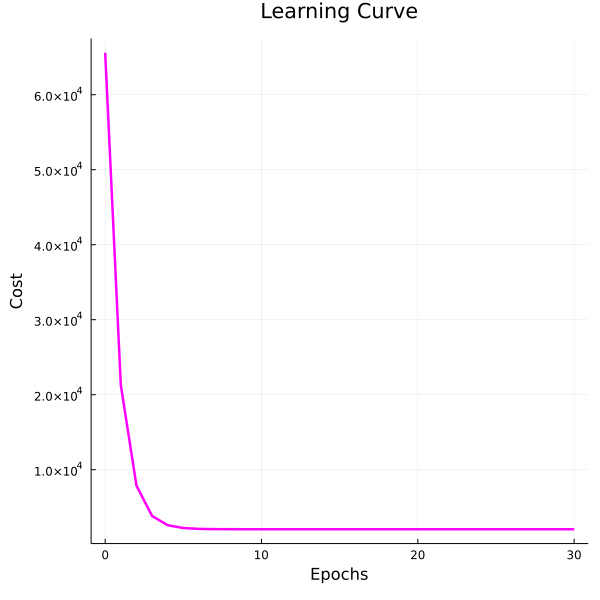

In [ ]:
gr(size = (600,600))
p_line = plot(0:epochs, J_history,
xlabel = "Epochs",
ylabel = "Cost",
title = "Learning Curve",
legend = false,
color = :magenta,
linewidth = 2.5)

predict price based on a new value size

In [ ]:
NewXML = [2000]
@show h(NewXML) 
@show predict(ols, NewX)

h(NewXML) = [340.0903784721927]
predict(ols, NewX) = Union{Missing, Float64}[340.35521176594494]


1-element Vector{Union{Missing, Float64}}:
 340.35521176594494

### ScikitLearn aproach using PyCall 
Using python functions to get the linear regression in scikitlearn

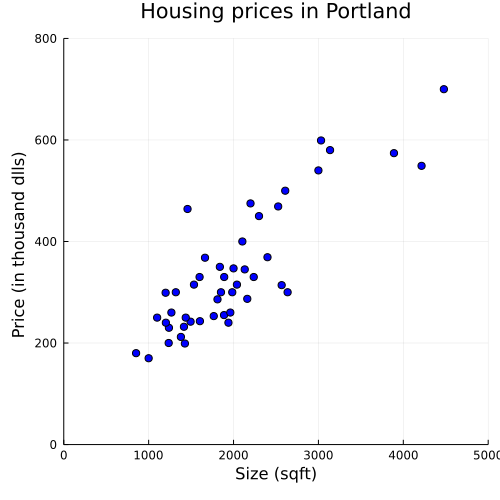

In [93]:

DF = DataFrame(tab)
gr(size = (500,500))
ScatterPlot = scatter(DF[!,"X"], DF[!,"Y"],
    xlims = (0, 5000),
    ylims = (0,800),
    xlabel = "Size (sqft)",
    ylabel = "Price (in thousand dlls) ",
    title = "Housing prices in Portland",
    legend = false,
    color = :blue,
    ) 

Importing the python modules into Julia

In [94]:
np = pyimport("numpy")
skl = pyimport("sklearn")

PyObject <module 'sklearn' from 'C:\\Users\\PC\\.julia\\conda\\3\\lib\\site-packages\\sklearn\\__init__.py'>

Splitting the data into training data, and testing data

In [77]:
X_train, X_test,Y_train,Y_test  = skl.model_selection.train_test_split(DF.X,DF.Y);

plotting the split data

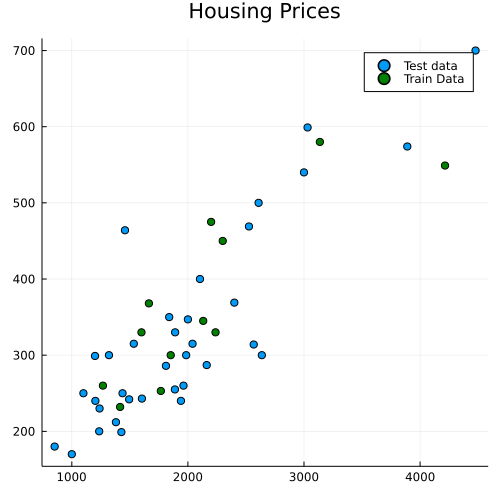

In [65]:
scatter(X_test,Y_test, label = "Test data", title="Housing Prices")
scatter!(X_train,Y_train, color = :green, label = "Train Data")

Define the model, training it, testing and plotting the regression

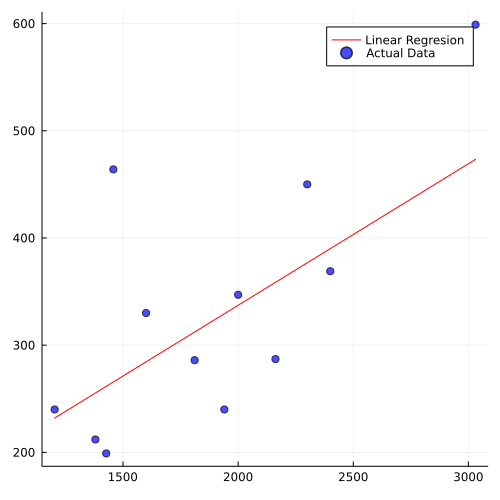

In [80]:
LR=skl.linear_model.LinearRegression()

LR.fit(np.reshape(X_train,(-1,1)),Y_train)
prediction = LR.predict(np.reshape(X_test,(-1,1)))
plot(X_test, prediction, label = "Linear Regresion", color = :red)
scatter!(X_test,Y_test, label="Actual Data", color = :blue, alpha = .7)

Predict a new value

In [96]:
LR.predict(np.array([[2000]]))[1]

337.24865551859136

scoring the model

In [97]:
LR.score(np.reshape(X_test,(-1,1)),Y_test)

0.473887496796887